In [2]:
import pandas as pd
import numpy as np

In [3]:
ls

Datasets/                              Logistic Regression_two_classes.ipynb
Datasets with two classes(old)/        making_datasets_for_two_class.ipynb
Datasets(Old)/                         temp_schema.csv
Logistic Regression.ipynb              updated_schema.csv


In [22]:
raw_df = pd.read_csv('Datasets/combined_dataset.csv')

In [23]:
pd.set_option('display.max_columns', 300)

In [24]:
raw_df

,NHY,CLASS,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,NP3RIGRL,NP3RIGLL,NP3FTAPR,NP3FTAPL,NP3HMOVR,NP3HMOVL,NP3PRSPR,NP3PRSPL,NP3TTAPR,NP3TTAPL,NP3LGAGR,NP3LGAGL,NP3RISNG,NP3GAIT,NP3FRZGT,NP3PSTBL,NP3POSTR,NP3BRADY,NP3PTRMR,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,DYSKPRES,MSEADLG,BENTONVERSION,COGDECLN,FNCDTCOG,COGSTATE,COGDXCL,ESS1,ESS2,ESS3,ESS4,ESS5,ESS6,ESS7,ESS8,GDSSATIS,GDSDROPD,GDSEMPTY,GDSBORED,GDSGSPIR,GDSAFRAD,GDSHAPPY,GDSHLPLS,GDSHOME,GDSMEMRY,GDSALIVE,GDSWRTLS,GDSENRGY,GDSHOPLS,GDSBETER,HVLTRT1,HVLTRT2,HVLTRT3,HVLTRDLY,HVLTREC,HVLTFPRL,HVLTFPUN,LNS1A,LNS1B,LNS1C,LNS2A,LNS2B,LNS2C,LNS3A,LNS3B,LNS3C,VLTANIM,MCAALTTM,MCACUBE,MCACLCKC,MCACLCKN,MCACLCKH,MCALION,MCARHINO,MCACAMEL,MCAFDS,MCABDS,MCAVIGIL,MCASER7,MCASNTNC,MCAVFNUM,MCAVF,MCAABSTR,MCAREC1,MCAREC2,MCAREC3,MCAREC4,MCAREC5,MCADATE,MCAMONTH,MCAYR,MCADAY,MCAPLACE,MCACITY,TMGAMBLE,CNTRLGMB,TMSEX,CNTRLSEX,TMBUY,CNTRLBUY,TMEAT,CNTRLEAT,TMTORACT,TMTMTACT,TMTRWD,DRMVIVID,DRMAGRAC,DRMNOCTB,SLPLMBMV,SLPINJUR,DRMVERBL,DRMFIGHT,DRMUMV,DRMOBJFL,MVAWAKEN,DRMREMEM,SLPDSTRB,SCAU1,SCAU2,SCAU3,SCAU4,SCAU5,SCAU6,SCAU7,SCAU8,SCAU9,SCAU10,SCAU11,SCAU12,SCAU13,SCAU14,SCAU15,SCAU16,SCAU17,SCAU18,SCAU19,SCAU20,SCAU21,SCAU26A,SCAU26B,SCAU26C,SCAU26D,STAIAD1,STAIAD2,STAIAD3,STAIAD4,STAIAD5,STAIAD6,STAIAD7,STAIAD8,STAIAD9,STAIAD10,STAIAD11,STAIAD12,STAIAD13,STAIAD14,STAIAD15,STAIAD16,STAIAD17,STAIAD18,STAIAD19,STAIAD20,STAIAD21,STAIAD22,STAIAD23,STAIAD24,STAIAD25,STAIAD26,STAIAD27,STAIAD28,STAIAD29,STAIAD30,STAIAD31,STAIAD32,STAIAD33,STAIAD34,STAIAD35,STAIAD36,STAIAD37,STAIAD38,STAIAD39,STAIAD40
0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,7.0,9.0,9.0,12.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,22.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,4.0,3.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,4.0,4.0,3.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,4.0,1.0,2.0,3.0,2.0,2.0,4.0,2.0
1,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,3.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,95.0,2.0,1.0,0.0,1.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,9.0,11.0,10.0,10.0,12.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,16.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0,4.0,4.0,1.0,3.0,1.0,4.0,3.0,1.0,1.0,2.0,4.0,3.0,1.0,1.0,4.0,4.0,3.0,1.0,3.0,1.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,2.0,4.0,3.0,2.0,4.0,1.0,2.0,4.0,1.0
2,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,3.0,0.0,90.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,10.0,12.0,10.0,11.0,1.0

In [25]:
raw_df.shape

(10014, 223)

In [26]:
raw_df['CLASS'].value_counts()

CLASS
1.0    6638
0.0    2795
2.0     581
Name: count, dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression(solver='liblinear')

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

In [30]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler, MaxAbsScaler

In [31]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score

In [32]:
cv = StratifiedKFold(n_splits = 5)

In [33]:
scaler = MinMaxScaler()

In [34]:
X = raw_df.iloc[:, 2:]

In [35]:
Y = raw_df.iloc[:, 1]

In [36]:
X.shape

(10014, 221)

In [37]:
Y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10009    0.0
10010    1.0
10011    0.0
10012    1.0
10013    1.0
Name: CLASS, Length: 10014, dtype: float64

In [38]:
fold_accuracies = []
fold_recalls = []
fold_precisions = []
fold_classification_reports = []
fold_weights = []

In [39]:
for fold, (train_index, test_index) in enumerate(cv.split(X, Y)):
    print(f"fold: {fold + 1}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # print(type(X_train))
    # print('X_train:')
    # print(X_train)
    # print()
    # print('X_test:')
    # print(X_test)
    # print()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    # print(type(X_train))
    # print('X_trained_scaled:')
    # print(X_train_scaled)
    # print()
    # print('X_test_scaled:')
    # print(X_test_scaled)
    # print()

    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred, average='macro')
    precision = precision_score(Y_test, Y_pred, average='macro')
    report = classification_report(Y_test, Y_pred, output_dict=True)

    fold_accuracies.append(accuracy)
    fold_recalls.append(recall)
    fold_precisions.append(precision)
    fold_classification_reports.append(report)

    fold_weight = model.coef_[0]
    fold_weights.append(fold_weight)
    # fold_classification_reports.append(classification_report(Y_test, Y_pred, output_dict=True))

    print(f"Accuracy for fold {fold + 1}: {accuracy:.4f}")
    print(f"Recall for fold {fold + 1}: {recall:.4f}")
    print(f"Precision for fold {fold + 1}: {precision:.4f}")
    print("-----")

fold: 1
Accuracy for fold 1: 0.9181
Recall for fold 1: 0.8494
Precision for fold 1: 0.8710
-----
fold: 2
Accuracy for fold 2: 0.9441
Recall for fold 2: 0.8673
Precision for fold 2: 0.9017
-----
fold: 3
Accuracy for fold 3: 0.9346
Recall for fold 3: 0.8313
Precision for fold 3: 0.9061
-----
fold: 4
Accuracy for fold 4: 0.8727
Recall for fold 4: 0.8509
Precision for fold 4: 0.7977
-----
fold: 5
Accuracy for fold 5: 0.8751
Recall for fold 5: 0.8017
Precision for fold 5: 0.8418
-----


In [40]:
fold_accuracies = np.array(fold_accuracies)
fold_precisions = np.array(fold_precisions)
fold_recalls = np.array(fold_recalls)
fold_weights = np.array(fold_weights)

In [41]:
print("Non-weighted:")
print(f"{fold_accuracies.mean():.4f}")
print(f"{fold_precisions.mean():.4f}")
print(f"{fold_recalls.mean():.4f}")
weights = fold_weights.mean(axis=0).tolist()
# print(weights)

Non-weighted:
0.9089
0.8636
0.8401


In [42]:
"""
WITHOUT SCALING:
acc: 0.8213
prec: 0.7320
recall: 0.6231

StandardScaler:
0.8235
0.7305
0.6193

Normalizer:
0.8235
0.7305
0.6193

MinMaxScaler:
0.8230
0.7472
0.6217

RobustScaler:
0.8199
0.7271
0.6054

MaxAbsScaler:
0.8232
0.7507
0.6214
"""

'\nWITHOUT SCALING:\nacc: 0.8213\nprec: 0.7320\nrecall: 0.6231\n\nStandardScaler:\n0.8235\n0.7305\n0.6193\n\nNormalizer:\n0.8235\n0.7305\n0.6193\n\nMinMaxScaler:\n0.8230\n0.7472\n0.6217\n\nRobustScaler:\n0.8199\n0.7271\n0.6054\n\nMaxAbsScaler:\n0.8232\n0.7507\n0.6214\n'

In [43]:
weight_df = pd.DataFrame({
    'features': X.columns.tolist(),
    'weights': weights
})

# input_cols = X_train.columns.tolist()
# weight_df = pd.DataFrame({
#     'feature': input_cols,
#     'weight': model.coef_.tolist()[0]
# })

In [25]:
weight_df

,features,weights
0,NP1COG,1.169626
1,NP1HALL,-0.123282
2,NP1DPRS,0.093619
3,NP1ANXS,0.514044
4,NP1APAT,0.631393
...,...,...
216,STAIAD36,0.005260
217,STAIAD37,0.127397
218,STAIAD38,0.205111
219,STAIAD39,-0.144360


In [54]:
def get_top_25_features(fold_data, metric_type="importance"):
    """
    Returns the top 25 features based on the specified metric type.
    Args:
    - fold_data: numpy array of fold_importances or fold_weights
    - metric_type: "importance" for models like XGBoost, "weight" for logistic regression
    """
    mean_values = fold_data.mean(axis=0)
    metric_column = "importance" if metric_type == "importance" else "weight"
    
    feature_df = pd.DataFrame({
        'feature': X.columns.tolist(),
        metric_column: mean_values
    })

    top_25_features = feature_df.sort_values(by=metric_column, ascending=False).head(25)
    return top_25_features


def get_table_with_type(top_25_features, schema_df):
    type_list_MN = []
    type_list_OS = []
    for feature in top_25_features['feature']:
        type_list_OS.append(schema_df['Updated Version 1'].loc[feature])
        type_list_MN.append(schema_df['Updated Version 2'].loc[feature])
    top_25_features['type_OS'] = type_list_OS
    top_25_features['type_MN'] = type_list_MN


def update_feature_table(fold_data, schema_filename, metric_type):
    """
    Updates the feature table based on the specified metric type.
    Args:
    - fold_data: numpy array of fold_importances or fold_weights
    - schema_filename: name of the schema csv file
    - metric_type: "importance" for models like XGBoost, "weight" for logistic regression
    """
    schema_df = pd.read_csv(schema_filename)
    schema_df.set_index('ITM_NAME', inplace=True)
    top_25_features = get_top_25_features(fold_data, metric_type)
    get_table_with_type(top_25_features, schema_df)
    return top_25_features

In [56]:
top_25_features_LR = update_feature_table(fold_weights, 'updated_schema.csv', 'weights')

In [57]:
top_25_features_LR.to_csv('top_25_features_LR.csv', index=False)

In [26]:
ls

Logistic Regression.ipynb              only_motor_two_classes.csv
Logistic Regression_two_classes.ipynb  only_non_motor_2.csv
combined_with_two_classes.csv          only_non_motor_two_classes.csv
making_datasets_for_two_class.ipynb    only_self_report_2.csv
new_merge_2.csv                        only_self_report_two_classes.csv
new_merge_2.cvs                        temp_schema.csv
only_motor_2.csv                       updated_schema.csv


In [35]:
def make_type_list(s_df, weights_df):
    #s_df refers to schema_df
    #weights_df could also be importances_df
    type_list = []

    s_df.set_index('ITM_NAME', inplace=True)
    top_20 = weights_df.sort_values('weights', ascending=False).head(20)
    for i in top_20['features'].tolist():
        type_list.append(s_df.loc[i]['TYPE'])
    print('Success')
    return type_list

In [36]:
def merge_type_list(test_list, weight_df):
    type_list = pd.Series(test_list)
    type_list_df = type_list.to_frame(name='type')
    # type_list_df.reset_index(drop=True, inplace=True)
    top_20 = weight_df.sort_values('weights', ascending=False).head(20)
    top_20.reset_index(drop=True, inplace=True)
    result_df = pd.concat([type_list_df, top_20], axis=1)
    return result_df

In [27]:
new_schema_df = pd.read_csv('updated_schema.csv')

In [28]:
new_schema_df

,ITM_NAME,DSCR,TYPE,FILE_NAME,Unnamed: 4,Updated Version 1,Updated Version 2,Combined
0,NP1COG,COGNITIVE IMPAIRMENT,Self Report,MDS-UPDRS_Part_I_24May2024.csv,NaN,Self Report,Non Motor,All of the above
1,NP1HALL,HALLUCINATIONS AND PSYCHOSIS,Self Report,MDS-UPDRS_Part_I_24May2024.csv,NaN,Self Report,Non Motor,NaN
2,NP1DPRS,DEPRESSED MOODS,Self Report,MDS-UPDRS_Part_I_24May2024.csv,NaN,Self Report,Non Motor,NaN
3,NP1ANXS,ANXIOUS MOOD,Self Report,MDS-UPDRS_Part_I_24May2024.csv,NaN,Self Report,Non Motor,NaN
4,NP1APAT,APATHY,Self Report,MDS-UPDRS_Part_I_24May2024.csv,NaN,Self Report,Non Motor,NaN
...,...,...,...,...,...,...,...,...
216,STAIAD36,STAI Question 36,Self Report,State-Trait_Anxiety_Inventory_24May2024.csv,NaN,Self Report,Non Motor,NaN
217,STAIAD37,STAI Question 37,Self Report,State-Trait_Anxiety_Inventory_24May2024.csv,NaN,Self Report,Non Motor,NaN
218,STAIAD38,STAI Question 38,Self Report,State-Trait_Anxiety_Inventory_24May2024.csv,NaN,Self Report,Non Motor,NaN
219,STAIAD39,STAI Question 39,Self Report,State-Trait_Anxiety_Inventory_24May2024.csv,NaN,Self Report,Non Motor,NaN


In [29]:
new_schema_OS_df = new_schema_df # OS -> Objective - Self_report

In [30]:
new_schema_OS_df['TYPE'] = new_schema_OS_df['Updated Version 1']

In [31]:
new_schema_OS_df.iloc[:, :3]

,ITM_NAME,DSCR,TYPE
0,NP1COG,COGNITIVE IMPAIRMENT,Self Report
1,NP1HALL,HALLUCINATIONS AND PSYCHOSIS,Self Report
2,NP1DPRS,DEPRESSED MOODS,Self Report
3,NP1ANXS,ANXIOUS MOOD,Self Report
4,NP1APAT,APATHY,Self Report
...,...,...,...
216,STAIAD36,STAI Question 36,Self Report
217,STAIAD37,STAI Question 37,Self Report
218,STAIAD38,STAI Question 38,Self Report
219,STAIAD39,STAI Question 39,Self Report


In [32]:
new_schema_OS_df.iloc[:, :3]

,ITM_NAME,DSCR,TYPE
0,NP1COG,COGNITIVE IMPAIRMENT,Self Report
1,NP1HALL,HALLUCINATIONS AND PSYCHOSIS,Self Report
2,NP1DPRS,DEPRESSED MOODS,Self Report
3,NP1ANXS,ANXIOUS MOOD,Self Report
4,NP1APAT,APATHY,Self Report
...,...,...,...
216,STAIAD36,STAI Question 36,Self Report
217,STAIAD37,STAI Question 37,Self Report
218,STAIAD38,STAI Question 38,Self Report
219,STAIAD39,STAI Question 39,Self Report


In [33]:
new_schema_OS_df.reset_index(inplace=True)

In [37]:
type_list_OS = make_type_list(new_schema_OS_df, weight_df)

Success


In [38]:
new_schema_OS_df_final = merge_type_list(type_list_OS, weight_df)

In [39]:
new_schema_OS_df_final

,type,features,weights
0,Self Report,MSEADLG,3.523550
1,Self Report,SCAU13,1.492817
2,Objective,NP3KTRMR,1.293956
3,Self Report,NP1PAIN,1.275965
4,Self Report,NP1COG,1.169626
5,Objective,NP3RISNG,1.137405
6,Self Report,NP1LTHD,1.087354
7,Objective,NP3KTRML,1.073614
8,Objective,NP3PTRMR,0.975397
9,Objective,NP3POSTR,0.824423


In [40]:
# Creating Motor - Non_motor schema

In [41]:
new_schema_df = pd.read_csv('updated_schema.csv')

In [51]:
new_schema_MN_df = new_schema_df

In [52]:
new_schema_MN_df['TYPE'] = new_schema_MN_df['Updated Version 2']

In [53]:
type_list_MN = make_type_list(new_schema_MN_df, weight_df)

Success


In [54]:
new_schema_MN_df_final = merge_type_list(type_list_MN, weight_df)

In [55]:
new_schema_MN_df.reset_index(inplace=True)

In [56]:
new_schema_MN_df_final

,type,features,weights
0,Non Motor,MSEADLG,3.523550
1,Non Motor,SCAU13,1.492817
2,Motor,NP3KTRMR,1.293956
3,Non Motor,NP1PAIN,1.275965
4,Non Motor,NP1COG,1.169626
5,Motor,NP3RISNG,1.137405
6,Non Motor,NP1LTHD,1.087354
7,Motor,NP3KTRML,1.073614
8,Motor,NP3PTRMR,0.975397
9,Motor,NP3POSTR,0.824423


In [ ]:
new_schema_df['COMBINED_TYPE'] = new_schema_df['Updated Version 2'] + '_' +  new_schema_df['Updated Version 1']

In [ ]:
new_schema_df

In [ ]:
new_schema_combined_df = new_schema_df

In [ ]:
new_schema_combined_df['TYPE'] = new_schema_combined_df['COMBINED_TYPE']

In [ ]:
new_schema_combined_df

In [ ]:
type_list_combined = make_type_list(new_schema_combined_df, weight_df)

In [ ]:
new_schema_combined_df_final = merge_type_list(type_list_combined, weight_df)

NameError: name 'type_list_MN' is not defined

In [46]:
new_schema_OS_df_final

,type,features,weights
0,Self Report,MSEADLG,3.523550
1,Self Report,SCAU13,1.492817
2,Objective,NP3KTRMR,1.293956
3,Self Report,NP1PAIN,1.275965
4,Self Report,NP1COG,1.169626
5,Objective,NP3RISNG,1.137405
6,Self Report,NP1LTHD,1.087354
7,Objective,NP3KTRML,1.073614
8,Objective,NP3PTRMR,0.975397
9,Objective,NP3POSTR,0.824423


,type,features,weights
0,Non Motor,MSEADLG,3.523550
1,Non Motor,SCAU13,1.492817
2,Motor,NP3KTRMR,1.293956
3,Non Motor,NP1PAIN,1.275965
4,Non Motor,NP1COG,1.169626
5,Motor,NP3RISNG,1.137405
6,Non Motor,NP1LTHD,1.087354
7,Motor,NP3KTRML,1.073614
8,Motor,NP3PTRMR,0.975397
9,Motor,NP3POSTR,0.824423


In [126]:
new_schema_combined_df_final

,type,features,weights
0,Non Motor_Self Report,MSEADLG,3.523550
1,Non Motor_Self Report,SCAU13,1.492817
2,Motor_Objective,NP3KTRMR,1.293956
3,Non Motor_Self Report,NP1PAIN,1.275965
4,Non Motor_Self Report,NP1COG,1.169626
5,Motor_Objective,NP3RISNG,1.137405
6,Non Motor_Self Report,NP1LTHD,1.087354
7,Motor_Objective,NP3KTRML,1.073614
8,Motor_Objective,NP3PTRMR,0.975397
9,Motor_Objective,NP3POSTR,0.824423


In [88]:
pd.set_option('display.max_rows', 250)

In [30]:
s_df.reset_index(inplace=True)

In [31]:
def make_type_list(s_df, weights_df):
    #s_df refers to schema_df
    #weights_df could also be importances_df
    type_list = []

    s_df.set_index('ITM_NAME', inplace=True)
    top_20 = weights_df.sort_values('weights', ascending=False).head(20)
    for i in top_20['features'].tolist():
        type_list.append(s_df.loc[i]['TYPE'])
    print('Success')
    return type_list

In [78]:
test_list = make_type_list(s_df, weight_df)

KeyError: "None of ['ITM_NAME'] are in the columns"

In [33]:
def merge_type_list(test_list, weight_df):
    type_list = pd.Series(test_list)
    type_list_df = type_list.to_frame(name='type')
    # type_list_df.reset_index(drop=True, inplace=True)
    top_20 = weight_df.sort_values('weights', ascending=False).head(20)
    top_20.reset_index(drop=True, inplace=True)
    result_df = pd.concat([type_list_df, top_20], axis=1)
    return result_df

In [34]:
top_20 = weight_df.sort_values('weights', ascending=False).head(20)

In [35]:
A = merge_type_list(test_list, weight_df)

In [38]:
A

,type,features,weights
0,Motor,MSEADLG,3.523550
1,Non Motor,SCAU13,1.492817
2,Motor,NP3KTRMR,1.293956
3,Self Report,NP1PAIN,1.275965
4,Self Report,NP1COG,1.169626
5,Motor,NP3RISNG,1.137405
6,Self Report,NP1LTHD,1.087354
7,Motor,NP3KTRML,1.073614
8,Motor,NP3PTRMR,0.975397
9,Motor,NP3POSTR,0.824423


In [ ]:
pd.Series(test_list).to_frame(name='column_name')

In [ ]:
test_list

In [ ]:
type_list = pd.Series(test_list)

In [ ]:
type_list

In [ ]:
type_list_df = type_list.to_frame(name='Type')

In [ ]:
type_list_df.shape

In [ ]:
top_20.shape

In [ ]:
type_list_df

In [ ]:
top_20

In [ ]:
result_df = pd.concat([type_list_df, top_20.reset_index(drop=True)], axis=1)

In [ ]:
result_df

In [ ]:
result_df

In [ ]:
result_df

In [28]:
s_df = pd.read_csv('temp_schema.csv')

In [29]:
s_df.set_index('ITM_NAME', inplace=True)

In [ ]:
type_list = []

In [ ]:
top_20 = weight_df.sort_values('weights', ascending=False).head(20)

In [ ]:
for i in top_20['features'].tolist():
    type_list.append(s_df.loc[i]['TYPE'])

In [ ]:
type_list

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10, 20))
sns.barplot(weight_df.sort_values('weights', ascending=False), x = 'weights', y = 'features')

In [ ]:
top_20 = weight_df.sort_values('weights', ascending=False).head(20)

In [ ]:
top_20

In [ ]:
['MCAVF',
 'LNS1B',
 'CNTRLGMB',
 'DRMVIVID',
 'MCACAMEL',
 'CNTRLEAT',
 'SCAU26C',
 'NP2FREZ',
 'NP3RTARL',
 'DBSYN',
 'FNCDTCOG',
 'NP3LGAGL',
 'MCAREC2',
 'SLPINJUR',
 'GDSBETER',
 'NP3KTRML',
 'NP2HYGN',
 'GDSDROPD',
 'STAIAD10',
 'SCAU7',
 'NP1COG',
 'LNS3B',
 'MCACLCKN',
 'NP1PAIN',
 'NP3RISNG']

In [ ]:
# WEIGHTED!

In [ ]:
model_2 = LogisticRegression(solver='liblinear', class_weight='balanced')

In [ ]:
fold_accuracies_2 = []
fold_recalls_2 = []
fold_precisions_2 = []
fold_classification_reports_2 = []

In [ ]:
for fold, (train_index, test_index) in enumerate(cv.split(X, Y)):
    print(f"fold: {fold + 1}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    model_2.fit(X_train, Y_train)
    Y_pred = model_2.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred, average='macro')
    precision = precision_score(Y_test, Y_pred, average='macro')
    report = classification_report(Y_test, Y_pred)

    fold_accuracies_2.append(accuracy)
    fold_recalls_2.append(recall)
    fold_precisions_2.append(precision)
    # fold_classification_reports.append(classification_report(Y_test, Y_pred, output_dict=True))

    print(f"Accuracy for fold {fold + 1}: {accuracy:.4f}")
    print(f"Recall for fold {fold + 1}: {recall:.4f}")
    print(f"Precision for fold {fold + 1}: {precision:.4f}")
    print("-----")

In [ ]:
fold_accuracies_2 = np.array(fold_accuracies_2)
fold_precisions_2 = np.array(fold_precisions_2)
fold_recalls_2 = np.array(fold_recalls_2)

In [ ]:
print("Weighted:")
print(fold_accuracies_2.mean())
print(fold_precisions_2.mean())
print(fold_recalls_2.mean())

In [ ]:
train_df, test_df = train_test_split(raw_df, test_size=0.2, random_state = 0)

In [ ]:
X_train = train_df.iloc[:, 2:]

In [ ]:
Y_train = train_df.iloc[:, 1]

In [ ]:
X_test = test_df.iloc[:, 2:]

In [ ]:
Y_test = test_df.iloc[:, 1]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
cv = StratifiedKFold(n_splits=5)

In [ ]:
cv_split = cv.split(X_train, Y_train)

In [ ]:
for one, two in cv_split:
    print(len(one))
    print(len(two))

In [15]:
model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [14]:
model.predict(X_train)

array([1., 1., 0., ..., 1., 0., 1.])

In [15]:
Y_train_pred = model.predict(X_train)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

In [34]:
accuracy_score(Y_train_pred, Y_train)

0.9560564987872735

In [35]:
Y_pred = model.predict(X_test)

In [36]:
accuracy_score(Y_pred, Y_test)

0.935440931780366

In [37]:
precision_score(Y_pred, Y_test, average='macro')

0.8557404860938008

In [38]:
recall_score(Y_pred, Y_test, average='macro')

0.8923871978492807

In [21]:
report = classification_report(Y_pred, Y_test)

In [22]:
print(report)

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94       867
         1.0       0.95      0.95      0.95      1986
         2.0       0.66      0.80      0.72       152

    accuracy                           0.94      3005
   macro avg       0.86      0.89      0.87      3005
weighted avg       0.94      0.94      0.94      3005



In [23]:
input_cols = X_train.columns.tolist()
weight_df = pd.DataFrame({
    'feature': input_cols,
    'weight': model.coef_.tolist()[0]
})

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='weight', ylabel='feature'>

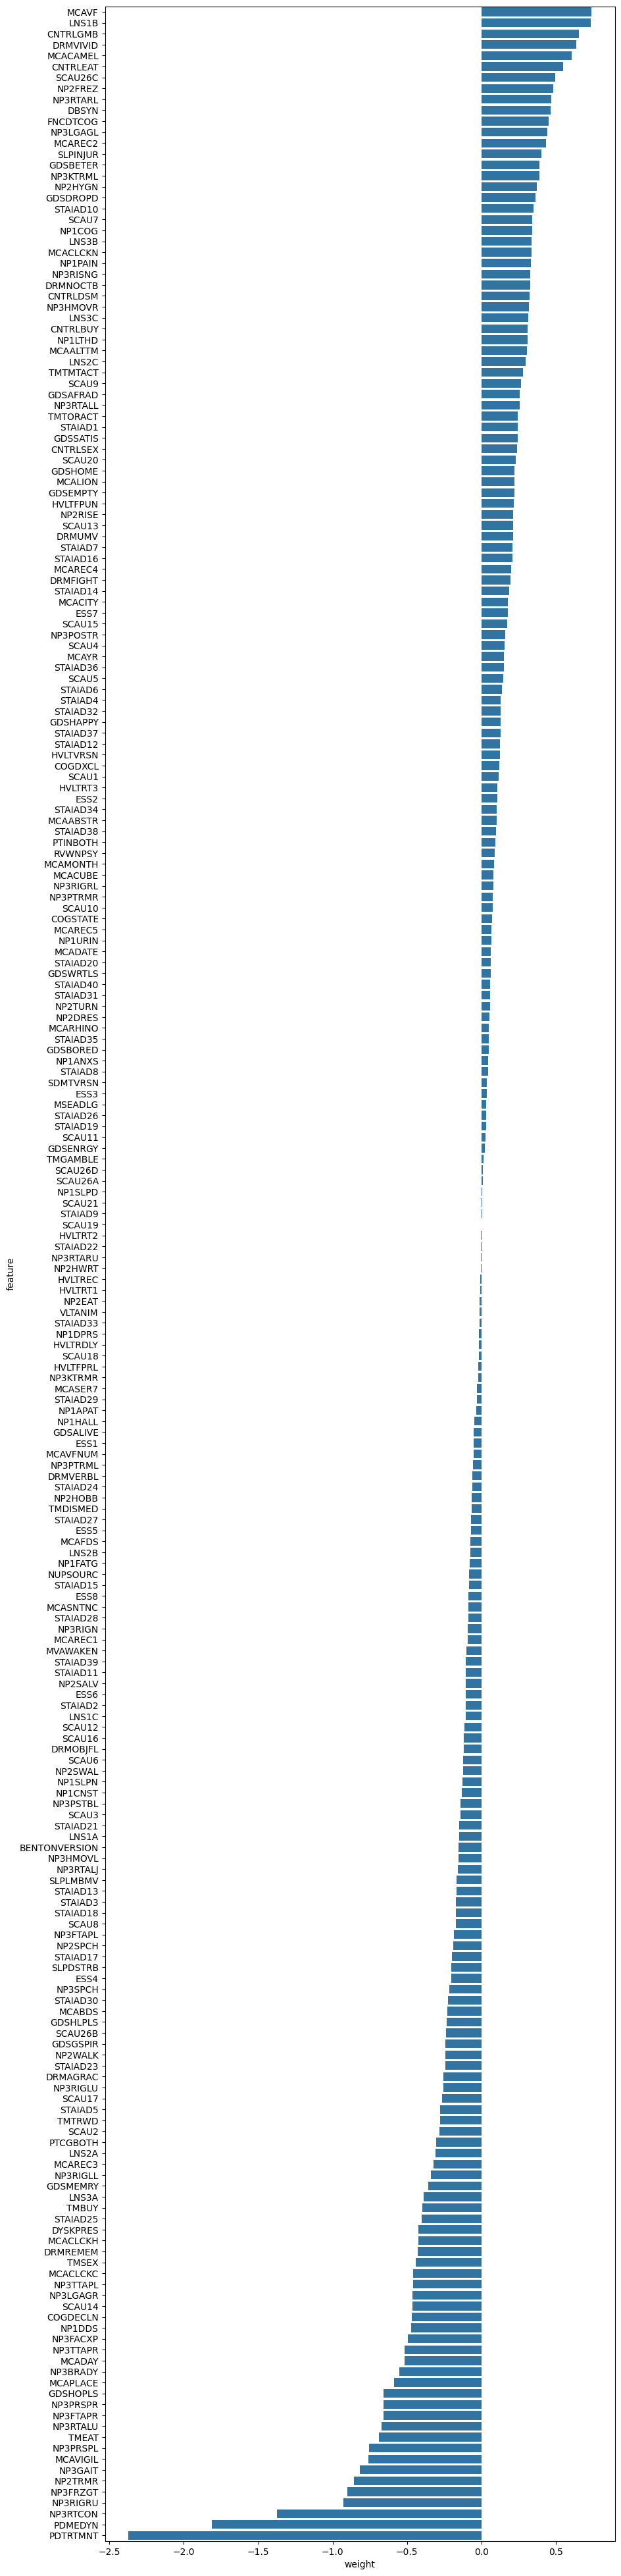

In [25]:
plt.figure(figsize=(10,50))
sns.barplot(data=weight_df.sort_values('weight', ascending=False), x='weight', y='feature')

In [28]:
top_25 = weight_df.sort_values('weight', ascending=False)['feature'].head(25).tolist()

In [31]:
top_25

['MCAVF',
 'LNS1B',
 'CNTRLGMB',
 'DRMVIVID',
 'MCACAMEL',
 'CNTRLEAT',
 'SCAU26C',
 'NP2FREZ',
 'NP3RTARL',
 'DBSYN',
 'FNCDTCOG',
 'NP3LGAGL',
 'MCAREC2',
 'SLPINJUR',
 'GDSBETER',
 'NP3KTRML',
 'NP2HYGN',
 'GDSDROPD',
 'STAIAD10',
 'SCAU7',
 'NP1COG',
 'LNS3B',
 'MCACLCKN',
 'NP1PAIN',
 'NP3RISNG']